## Imports

In [2]:
# Built-in
import os
import pickle

In [1]:
# Exploratory Data Analysis (Visualizing the data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory

# Transformers (Transforming the data)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Scalers (Scaling the data)

# Selection (Selecting the data/feature)
from sklearn.model_selection import train_test_split

# Models (Building the models)

# Parameter Tuning (Testing various paramaters)
from sklearn.model_selection import GridSearchCV

# Metrics (Evaluating the data)

In [3]:
# Local
from packages.preprocessing import Preprocessing

# Notebook Utilities
%matplotlib inline

## Reading Data

In [4]:
data = pd.read_csv(f'../data/interim/train.csv')
v_data = pd.read_csv(f'../data/interim/validation.csv')

In [5]:
data.head()

,Image,Label
0,../data/raw/train/Apple Red 1/0_100.jpg,Apple Red 1
1,../data/raw/train/Apple Red 1/100_100.jpg,Apple Red 1
2,../data/raw/train/Apple Red 1/101_100.jpg,Apple Red 1
3,../data/raw/train/Apple Red 1/102_100.jpg,Apple Red 1
4,../data/raw/train/Apple Red 1/103_100.jpg,Apple Red 1


In [6]:
v_data.head()

,Image,Label
0,../data/raw/validation/Apple Red 1/321_100.jpg,Apple Red 1
1,../data/raw/validation/Apple Red 1/322_100.jpg,Apple Red 1
2,../data/raw/validation/Apple Red 1/323_100.jpg,Apple Red 1
3,../data/raw/validation/Apple Red 1/324_100.jpg,Apple Red 1
4,../data/raw/validation/Apple Red 1/325_100.jpg,Apple Red 1


## Preprocessing Pipeline

In [7]:
preprocessor = Preprocessing(size=(100, 100))

## Train-Test Split

In [8]:
x_train = data.drop(['Label'], axis=1)
y_train = data.Label

x_validation = v_data.drop(['Label'], axis=1)
y_validation = v_data.Label

## Fitting the training values

In [9]:
x_train = preprocessor.fit(x_train)
x_validation = preprocessor.fit(x_validation)

In [22]:
train = ImageDataGenerator(rescale=1/255).flow_from_directory('../data/processed/train/', 
                                                              target_size=(data['Width'][0], 
                                                                           data['Height'][0]), 
                                                              class_mode='sparse')
validation = ImageDataGenerator(rescale=1/255).flow_from_directory('../data/processed/validation/', 
                                                                   target_size=(v_data['Width'][0], 
                                                                                data['Height'][0]), 
                                                                   class_mode='sparse')

Found 1474 images belonging to 3 classes.
Found 494 images belonging to 3 classes.


In [25]:
dat = image_dataset_from_directory('../data/processed/train/', image_size=(100, 100))

Found 1474 files belonging to 3 classes.


In [26]:
dat.save('../data/processed/train_data/')

In [27]:
dat = image_dataset_from_directory('../data/processed/validation/', image_size=(100, 100))

Found 494 files belonging to 3 classes.


In [28]:
dat.save('../data/processed/validation_data/')

## Transformed Data

In [10]:
x_train.head()

,Image,Width,Height
0,../data/processed/train/Apple Red 1/0_100.jpg,100,100
1,../data/processed/train/Apple Red 1/100_100.jpg,100,100
2,../data/processed/train/Apple Red 1/101_100.jpg,100,100
3,../data/processed/train/Apple Red 1/102_100.jpg,100,100
4,../data/processed/train/Apple Red 1/103_100.jpg,100,100


In [11]:
x_validation.head()

,Image,Width,Height
0,../data/processed/validation/Apple Red 1/321_1...,100,100
1,../data/processed/validation/Apple Red 1/322_1...,100,100
2,../data/processed/validation/Apple Red 1/323_1...,100,100
3,../data/processed/validation/Apple Red 1/324_1...,100,100
4,../data/processed/validation/Apple Red 1/325_1...,100,100


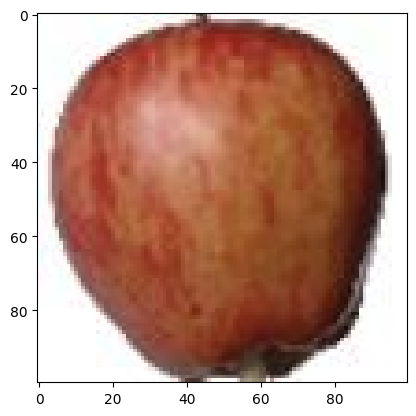

In [12]:
im = plt.imread(x_train['Image'][0])
plt.imshow(im)

## Saving the Model and Data

In [27]:
train.save_to_dir
# .save_to_dir('../data/processed/train_data')
# validation.save_to_dir('../data/processed/validation_data')

['Apple Red 1\\0_100.jpg',
 'Apple Red 1\\100_100.jpg',
 'Apple Red 1\\101_100.jpg',
 'Apple Red 1\\102_100.jpg',
 'Apple Red 1\\103_100.jpg',
 'Apple Red 1\\104_100.jpg',
 'Apple Red 1\\105_100.jpg',
 'Apple Red 1\\106_100.jpg',
 'Apple Red 1\\107_100.jpg',
 'Apple Red 1\\108_100.jpg',
 'Apple Red 1\\109_100.jpg',
 'Apple Red 1\\10_100.jpg',
 'Apple Red 1\\110_100.jpg',
 'Apple Red 1\\111_100.jpg',
 'Apple Red 1\\112_100.jpg',
 'Apple Red 1\\113_100.jpg',
 'Apple Red 1\\114_100.jpg',
 'Apple Red 1\\115_100.jpg',
 'Apple Red 1\\116_100.jpg',
 'Apple Red 1\\117_100.jpg',
 'Apple Red 1\\118_100.jpg',
 'Apple Red 1\\119_100.jpg',
 'Apple Red 1\\11_100.jpg',
 'Apple Red 1\\120_100.jpg',
 'Apple Red 1\\121_100.jpg',
 'Apple Red 1\\122_100.jpg',
 'Apple Red 1\\123_100.jpg',
 'Apple Red 1\\124_100.jpg',
 'Apple Red 1\\125_100.jpg',
 'Apple Red 1\\126_100.jpg',
 'Apple Red 1\\127_100.jpg',
 'Apple Red 1\\128_100.jpg',
 'Apple Red 1\\129_100.jpg',
 'Apple Red 1\\12_100.jpg',
 'Apple Red 1\\130_

In [15]:
with open('../models/preprocessor.pkl', 'wb') as f:
    pickle.dump(Preprocessing, f)

In [14]:
data = x_train
data['Label'] = y_train
v_data = x_validation
v_data['Label'] = y_validation

In [16]:
data.to_csv('../data/processed/train.csv', index=False)
v_data.to_csv('../data/processed/validation.csv', index=False)